In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("data/OnlineRetail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,NaN
1,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,NaN
2,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,NaN
3,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,NaN
4,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,NaN
...,...,...,...,...,...,...,...,...,...
541905,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN
541906,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
541907,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
541908,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,NaN


In [ ]:
df = df[df['CustomerID'].notnull()]
df.shape

(406830, 9)

In [ ]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


/var/folders/ps/3wmp571j79j2210msrgh_l8m0000gn/T/ipykernel_51527/3192285866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
/var/folders/ps/3wmp571j79j2210msrgh_l8m0000gn/T/ipykernel_51527/3192285866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40
1,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
2,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
3,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
4,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
...,...,...,...,...,...,...,...,...,...
541905,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
541906,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
541907,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
541908,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30


In [ ]:
def compute_rfm(df):
    today = df['InvoiceDate'].max() + pd.Timedelta(days=1)
    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (today - x.max()).days,
        'InvoiceNo': 'nunique',
        'TotalPrice': 'sum'
    }).reset_index()
    rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
    return rfm

In [ ]:
import pandas as pd

In [ ]:
def segment_customer(row):
    if row['Recency'] <= 30 and row['Frequency'] >= 5 and row['Monetary'] > 1000:
        return "Loyal"
    elif 60 < row['Recency'] < 90 and row['Monetary'] > 500:
        return "At Risk"
    elif row['Recency'] <= 60 and row['Frequency'] >= 3:
        return "Active"
    elif row['Frequency'] <= 2 and row['Recency'] <= 30:
        return "Upcoming"
    else:
        return "Inactive"

In [ ]:
# Assign segments to customers
def assign_segments(rfm):
    rfm['Segment'] = rfm.apply(segment_customer, axis=1)
    return rfm

# Apply RFM segmentation
rfm = compute_rfm(df)
rfm = assign_segments(rfm)

# Preview RFM table
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Segment
0,12346.0,326,2,0.00,Inactive
1,12347.0,2,7,4310.00,Loyal
2,12348.0,75,4,1797.24,At Risk
3,12349.0,19,1,1757.55,Upcoming
4,12350.0,310,1,334.40,Inactive


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
rfm['Segment_Encoded'] = le.fit_transform(rfm['Segment'])

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,Segment,Segment_Encoded
0,12346.0,326,2,0.00,Inactive,2
1,12347.0,2,7,4310.00,Loyal,3
2,12348.0,75,4,1797.24,At Risk,1
3,12349.0,19,1,1757.55,Upcoming,4
4,12350.0,310,1,334.40,Inactive,2
...,...,...,...,...,...,...
4368,18281.0,181,1,80.82,Inactive,2
4369,18282.0,8,3,176.60,Active,0
4370,18283.0,4,16,2094.88,Loyal,3
4371,18287.0,43,3,1837.28,Active,0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

In [ ]:

# Prepare features and target
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Segment_Encoded']


In [ ]:
X

,Recency,Frequency,Monetary
0,326,2,0.00
1,2,7,4310.00
2,75,4,1797.24
3,19,1,1757.55
4,310,1,334.40
...,...,...,...
4368,181,1,80.82
4369,8,3,176.60
4370,4,16,2094.88
4371,43,3,1837.28


In [ ]:
y

0       2
1       3
2       1
3       4
4       2
       ..
4368    2
4369    0
4370    3
4371    0
4372    2
Name: Segment_Encoded, Length: 4373, dtype: int64

In [ ]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(rfc, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores)}")

# Feature importance
feature_importance = rfc.feature_importances_
feature_importance
print(f"Feature importance: {dict(zip(X.columns, feature_importance))}") 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       183
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00       388
           3       1.00      0.99      1.00       152
           4       1.00      1.00      1.00        91

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875

Cross-validation scores: [0.99657143 0.99885714 1.         1.         1.        ]
Average cross-validation score: 0.9990857142857144
Feature importance: {'Recency': 0.5345742035563524, 'Frequency': 0.2742492723723166, 'Monetary': 0.191176524071331}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Use different variable names to avoid conflicts
X_rfm = rfm[['Recency', 'Frequency', 'Monetary']]
y_rfm = rfm['Segment_Encoded']

# Split into train and test sets
X_rfm_train, X_rfm_test, y_rfm_train, y_rfm_test = train_test_split(X_rfm, y_rfm, test_size=0.2, random_state=42)

# Logistic Regression
logr_rfm = LogisticRegression(max_iter=1000, random_state=42)
logr_rfm.fit(X_rfm_train, y_rfm_train)
print("Logistic Regression train accuracy:", logr_rfm.score(X_rfm_train, y_rfm_train))
print("Logistic Regression test accuracy:", logr_rfm.score(X_rfm_test, y_rfm_test))



Logistic Regression train accuracy: 0.8067467124070897
Logistic Regression test accuracy: 0.792


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import joblib
joblib.dump(rfc, 'test_model.joblib') 

['test_model.joblib']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/var/folders/ps/3wmp571j79j2210msrgh_l8m0000gn/T/ipykernel_51527/1973612926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', palette='viridis')


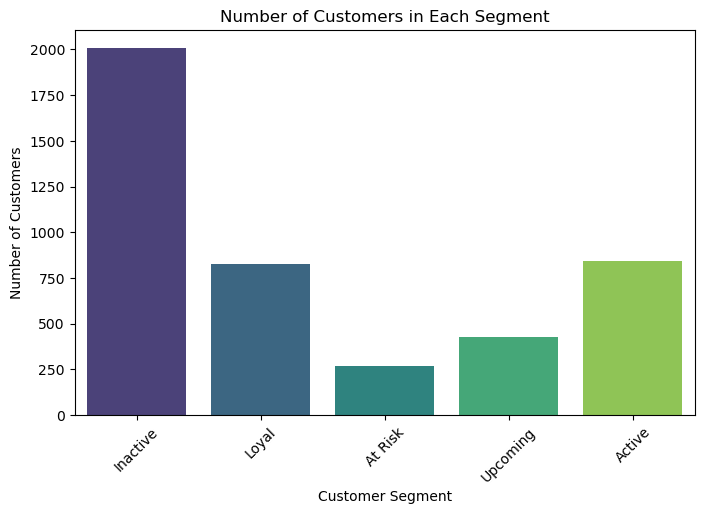

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x='Segment', palette='viridis')
plt.title('Number of Customers in Each Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()
